BƯỚC 1.1: LOAD VÀ KIỂM TRA CẤU TRÚC DỮ LIỆU

📊 Event Logs Shape: (1259411, 8)
        id  timecreated                               eventname    action  \
0  9194694   1662013333               \core\event\user_loggedin  loggedin   
1  9194695   1662013334            \core\event\dashboard_viewed    viewed   
2  9194708   1662013917  \core\event\webservice_function_called    called   
3  9194709   1662013917  \core\event\webservice_function_called    called   
4  9194710   1662013917  \core\event\webservice_function_called    called   

                target  userid  courseid  \
0                 user    8774         0   
1            dashboard    8774         0   
2  webservice_function    8723         0   
3  webservice_function    8723         0   
4  webservice_function    8723         0   

                                               other  
0                            {"username": "*******"}  
1                                                NaN  
2      {"function": "********

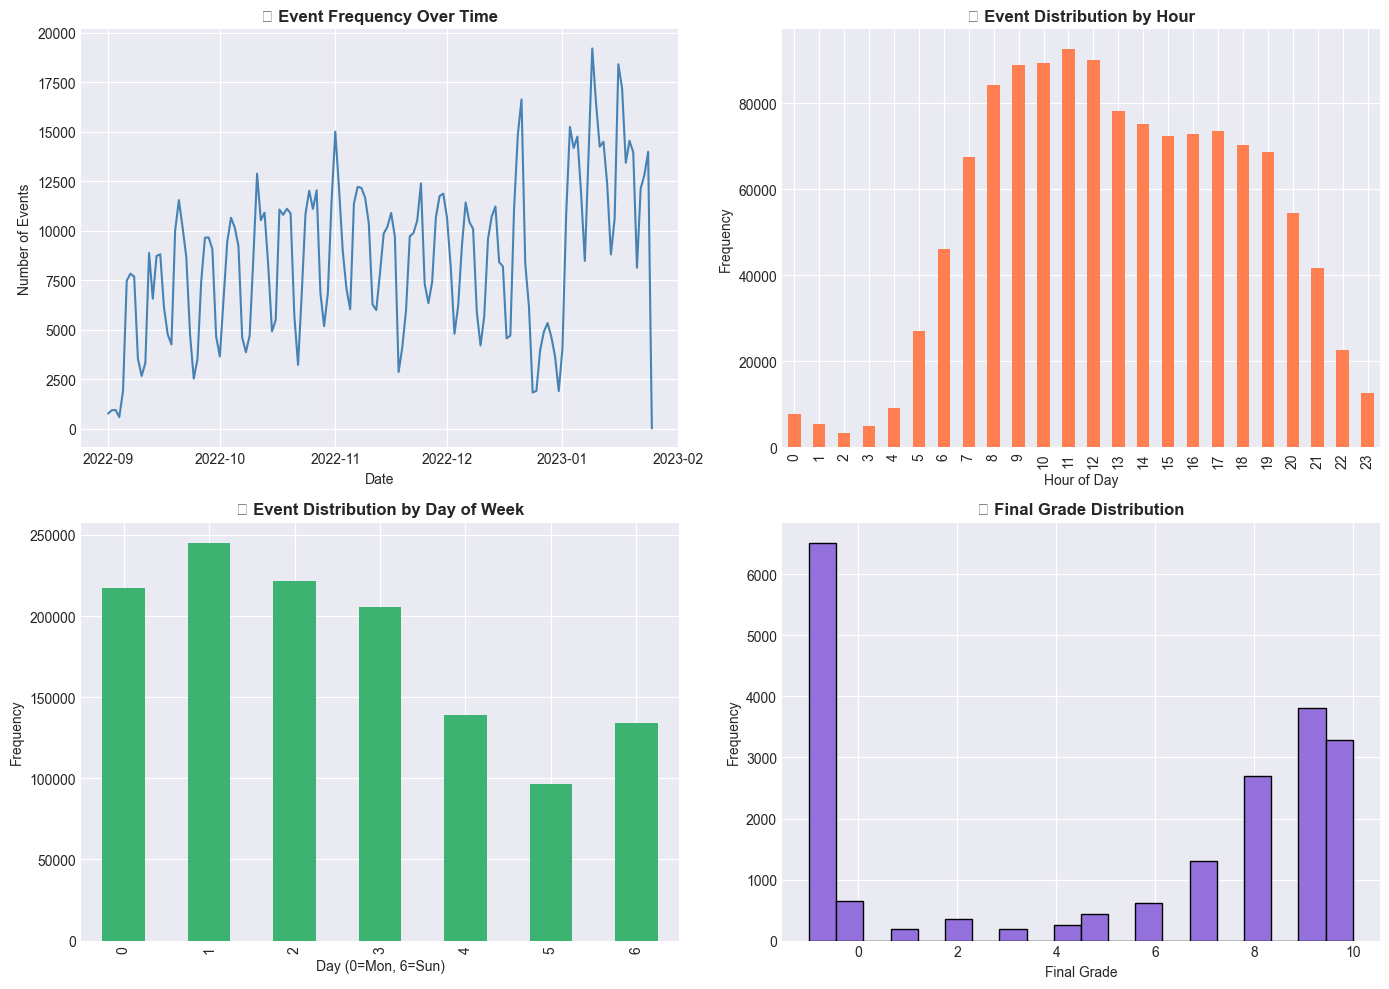

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# ============================================================================
# BƯỚC 1: EDA CHO ADAPTIVE LEARNING SYSTEM - OULAD/MOODLE DATA
# ============================================================================

# Cấu hình hiển thị
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)

# ----------------------------------------------------------------------------
# 1. LOAD DATA
# ----------------------------------------------------------------------------
print("="*80)
print("BƯỚC 1.1: LOAD VÀ KIỂM TRA CẤU TRÚC DỮ LIỆU")
print("="*80)

df_events = pd.read_csv('../data/udk_moodle_log.csv')
df_grades = pd.read_csv('../data/udk_moodle_all_grades.csv')


print("\n📊 Event Logs Shape:", df_events.shape)
print(df_events.head())
print("\n📊 Grade Records Shape:", df_grades.shape)
print(df_grades.head())

# ----------------------------------------------------------------------------
# 2. DATA QUALITY AUDIT
# ----------------------------------------------------------------------------
print("\n" + "="*80)
print("BƯỚC 1.2: AUDIT CHẤT LƯỢNG DỮ LIỆU")
print("="*80)

def audit_dataframe(df, name):
    print(f"\n🔍 {name} - Data Quality Report:")
    print(f"   • Total records: {len(df):,}")
    print(f"   • Duplicates: {df.duplicated().sum():,}")
    print(f"   • Missing values:\n{df.isnull().sum()}")
    print(f"   • Data types:\n{df.dtypes}")
    
audit_dataframe(df_events, "Event Logs")
audit_dataframe(df_grades, "Grade Records")

# Kiểm tra unique users và courses
print(f"\n📈 Thống kê cơ bản:")
print(f"   • Unique users (events): {df_events['userid'].nunique():,}")
print(f"   • Unique courses (events): {df_events['courseid'].nunique():,}")
print(f"   • Unique users (grades): {df_grades['userid'].nunique():,}")
print(f"   • Unique courses (grades): {df_grades['courseid'].nunique():,}")

# ----------------------------------------------------------------------------
# 3. TEMPORAL ANALYSIS (Phân tích thời gian)
# ----------------------------------------------------------------------------
print("\n" + "="*80)
print("BƯỚC 1.3: PHÂN TÍCH TEMPORAL PATTERNS")
print("="*80)

# Convert timestamp to datetime
df_events['datetime'] = pd.to_datetime(df_events['timecreated'], unit='s')
df_grades['datetime'] = pd.to_datetime(df_grades['timemodified'], unit='s')

# Trích xuất temporal features
df_events['hour'] = df_events['datetime'].dt.hour
df_events['dayofweek'] = df_events['datetime'].dt.dayofweek
df_events['date'] = df_events['datetime'].dt.date

print("\n⏰ Event frequency by hour:")
print(df_events['hour'].value_counts().sort_index())

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Events over time
df_events.groupby('date').size().plot(ax=axes[0,0], color='steelblue')
axes[0,0].set_title('📅 Event Frequency Over Time', fontsize=12, fontweight='bold')
axes[0,0].set_xlabel('Date')
axes[0,0].set_ylabel('Number of Events')

# Plot 2: Events by hour
df_events['hour'].value_counts().sort_index().plot(kind='bar', ax=axes[0,1], color='coral')
axes[0,1].set_title('⏰ Event Distribution by Hour', fontsize=12, fontweight='bold')
axes[0,1].set_xlabel('Hour of Day')
axes[0,1].set_ylabel('Frequency')

# Plot 3: Events by day of week
df_events['dayofweek'].value_counts().sort_index().plot(kind='bar', ax=axes[1,0], color='mediumseagreen')
axes[1,0].set_title('📆 Event Distribution by Day of Week', fontsize=12, fontweight='bold')
axes[1,0].set_xlabel('Day (0=Mon, 6=Sun)')
axes[1,0].set_ylabel('Frequency')

# Plot 4: Grade distribution
axes[1,1].hist(df_grades['finalgrade'], bins=20, color='mediumpurple', edgecolor='black')
axes[1,1].set_title('📊 Final Grade Distribution', fontsize=12, fontweight='bold')
axes[1,1].set_xlabel('Final Grade')
axes[1,1].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig('eda_temporal_analysis.png', dpi=150, bbox_inches='tight')
print("✅ Saved: eda_temporal_analysis.png")

# ----------------------------------------------------------------------------
# 4. BEHAVIORAL ANALYSIS (Phân tích hành vi)
# ----------------------------------------------------------------------------
print("\n" + "="*80)
print("BƯỚC 1.4: PHÂN TÍCH BEHAVIORAL PATTERNS")
print("="*80)

# Event type distribution
print("\n📌 Event Name Distribution:")
print(df_events['eventname'].value_counts())

print("\n📌 Action Type Distribution:")
print(df_events['action'].value_counts())

print("\n📌 Target Type Distribution:")
print(df_events['target'].value_counts())

# User activity level
user_activity = df_events.groupby('userid').size()
print(f"\n👥 User Activity Statistics:")
print(f"   • Mean events per user: {user_activity.mean():.2f}")
print(f"   • Median events per user: {user_activity.median():.2f}")
print(f"   • Std events per user: {user_activity.std():.2f}")
print(f"   • Min-Max: [{user_activity.min()}, {user_activity.max()}]")

# ----------------------------------------------------------------------------
# 5. FEATURE EXTRACTION (Chuẩn bị cho Bước 2)
# ----------------------------------------------------------------------------
print("\n" + "="*80)
print("BƯỚC 1.5: TRÍCH XUẤT STATISTICAL FEATURES")
print("="*80)

# Aggregate per user
user_features = df_events.groupby('userid').agg({
    'id': 'count',  # Total events
    'timecreated': ['min', 'max'],  # Active period
    'eventname': lambda x: x.nunique(),  # Event diversity
    'courseid': lambda x: x.nunique()  # Course participation
}).reset_index()

user_features.columns = ['userid', 'total_events', 'first_event', 'last_event', 
                         'event_diversity', 'num_courses']

# Calculate session duration (in days)
user_features['active_days'] = (
    pd.to_datetime(user_features['last_event'], unit='s') - 
    pd.to_datetime(user_features['first_event'], unit='s')
).dt.days

# Merge with grades
user_grades = df_grades.groupby('userid')['finalgrade'].agg(['mean', 'std', 'count'])
user_grades.columns = ['avg_grade', 'grade_std', 'num_assessments']
user_features = user_features.merge(user_grades, on='userid', how='left')

print("\n📋 User Feature Summary:")
print(user_features.describe())

# Save for Bước 2
user_features.to_csv('user_features_step1.csv', index=False)
print("\n✅ Saved: user_features_step1.csv (dùng cho Bước 2 - Standardization)")

# ----------------------------------------------------------------------------
# 6. STATISTICAL DISTRIBUTIONS (Quan trọng cho Bước 5 - Simulation)
# ----------------------------------------------------------------------------
print("\n" + "="*80)
print("BƯỚC 1.6: TRÍCH XUẤT STATISTICAL DISTRIBUTIONS")
print("="*80)

distributions = {
    'total_events': {
        'mean': user_features['total_events'].mean(),
        'std': user_features['total_events'].std(),
        'min': user_features['total_events'].min(),
        'max': user_features['total_events'].max(),
        'percentiles': user_features['total_events'].quantile([0.25, 0.5, 0.75]).to_dict()
    },
    'avg_grade': {
        'mean': user_features['avg_grade'].mean(),
        'std': user_features['avg_grade'].std(),
        'min': user_features['avg_grade'].min(),
        'max': user_features['avg_grade'].max(),
        'percentiles': user_features['avg_grade'].quantile([0.25, 0.5, 0.75]).to_dict()
    },
    'active_days': {
        'mean': user_features['active_days'].mean(),
        'std': user_features['active_days'].std(),
        'min': user_features['active_days'].min(),
        'max': user_features['active_days'].max(),
        'percentiles': user_features['active_days'].quantile([0.25, 0.5, 0.75]).to_dict()
    }
}

print("\n📊 Statistical Distributions (dùng cho Bước 5 - Simulation):")
for feature, stats in distributions.items():
    print(f"\n🔹 {feature}:")
    for stat_name, value in stats.items():
        print(f"   • {stat_name}: {value}")

# Save distributions (convert numpy types to native Python types)
import json

def convert_to_serializable(obj):
    """Convert numpy types to native Python types for JSON serialization"""
    if isinstance(obj, dict):
        return {k: convert_to_serializable(v) for k, v in obj.items()}
    elif isinstance(obj, (np.integer, np.floating)):
        return float(obj)
    elif isinstance(obj, np.ndarray):
        return obj.tolist()
    else:
        return obj

distributions_serializable = convert_to_serializable(distributions)

with open('feature_distributions.json', 'w') as f:
    json.dump(distributions_serializable, f, indent=2)
print("\n✅ Saved: feature_distributions.json")

# ----------------------------------------------------------------------------
# 7. KẾT LUẬN VÀ NEXT STEPS
# ----------------------------------------------------------------------------
print("\n" + "="*80)
print("🎯 BƯỚC 1 HOÀN THÀNH - KẾT LUẬN")
print("="*80)

print("""
✅ ĐÃ HOÀN THÀNH:
   1. Load và audit dữ liệu OULAD/Moodle logs
   2. Phân tích temporal patterns (giờ, ngày, tuần)
   3. Phân tích behavioral patterns (event types, actions)
   4. Trích xuất user-level features
   5. Tính toán statistical distributions

📂 OUTPUT FILES:
   • eda_temporal_analysis.png - Visualization
   • user_features_step1.csv - User-level aggregated features
   • feature_distributions.json - Statistical distributions

🔜 NEXT STEPS (BƯỚC 2):
   → Standardize features (Z-score normalization)
   → Handle outliers
   → Prepare data cho clustering (Bước 3)

💡 LIÊN KẾT VỚI Q-LEARNING:
   • total_events, event_diversity → có thể dùng để define STATE SPACE
   • avg_grade, grade_std → có thể dùng để define REWARD FUNCTION
   • temporal patterns → có thể mô phỏng realistic student behavior (Bước 5)
""")

plt.show()